## Bike sharing demands
train 기반으로 test set 에측!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats

# 안에 그래프 그리기 위해
%matplotlib inline

# 그래프에서 격자로 숫자범위 눈에 잘 보이도록 
plt.style.use('ggplot')

# 마이너스 폰트 깨는거 방지
mpl.rcParams['axes.unicode_minus'] = False

In [4]:
train = pd.read_csv('bike_train.csv', parse_dates = ['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
train.shape

(10886, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
"""
import missingno as msno

msno.maxtrix(train, figsize=(12,5))
"""

## missingno pkg로 결측치 시각화 되는데, 현 파이썬 버전 안되어서 확인 중

'\nimport missingno as msno\n\nmsno.maxtrix(train, figsize=(12,5))\n'

In [13]:
# train datatime을 모두 년/월/일/시간/분/초로 나누어 시각화 해보기

train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


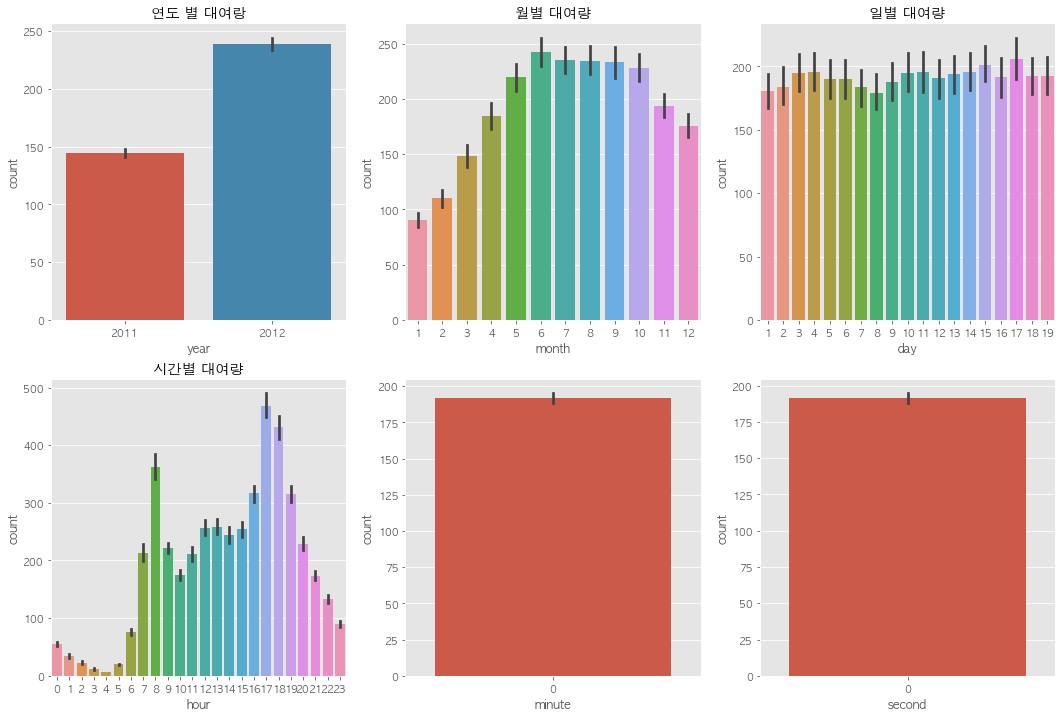

In [23]:
mpl.rc('font', family='AppleGothic')
       
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,12)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = 'count', title = '연도 별 대여랑')
ax2.set(xlabel = 'month', title = '월별 대여량')
ax3.set(xlabel = 'day', title = '일별 대여량')
ax4.set(xlabel = 'hour', title = '시간별 대여량')

plt.show()
    

## 해석
- 연도별 대여량은 2012년이 2011년 보다 많다.
- 월별 대여량은, 6월에 가장 많고, 7 - 10월에 많다. 그리고 1월에 적다 --> 여름/가을에 대여량이 많으며, 겨울에 현저히 줄어든다
- 일별 대여량은 1 - 19까지만 있고, 나머지는 test.csv에 있다. 따라서 이 데이터는 feature engineering에 사용할 수 없다
- 시간 대 대여량을 보면, 출퇴근시간 사용량이 많은 것 같다. 하지만 주말과 평일을 나누어 봐야 할 것 같다.
- 초/분은 의미없다 -> 사용안함 

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

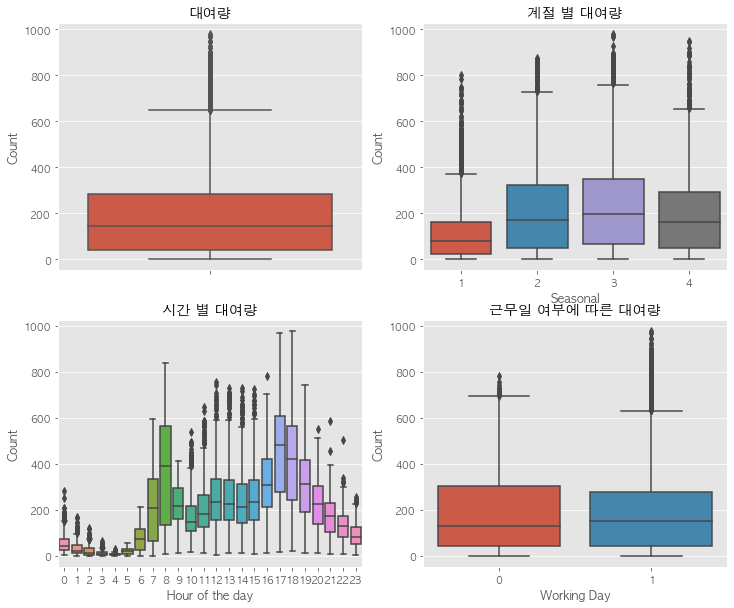

In [28]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)

sns.boxplot(data = train, y = 'count', orient = 'v', ax = axes[0][0])
sns.boxplot(data = train, x = 'season', y = 'count',orient = 'v', ax = axes[0][1])
sns.boxplot(data = train, x = 'hour', y = 'count', orient = 'v', ax = axes[1][0])
sns.boxplot(data = train, x = 'workingday', y = 'count', orient = 'v', ax = axes[1][1])

axes[0][0].set(ylabel = 'Count', title = '대여량')
axes[0][1].set(xlabel = 'Seasonal', ylabel = 'Count', title = '계절 별 대여량')
axes[1][0].set(xlabel = 'Hour of the day', ylabel = 'Count', title = '시간 별 대여량')
axes[1][1].set(xlabel = 'Working Day', ylabel = 'Count', title = '근무일 여부에 따른 대여량')


In [25]:
train['dayofweek'] = train['datetime'].dt.dayofweek
train.shape

(10886, 19)

In [26]:
train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

In [27]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0,5


<AxesSubplot:xlabel='hour', ylabel='count'>

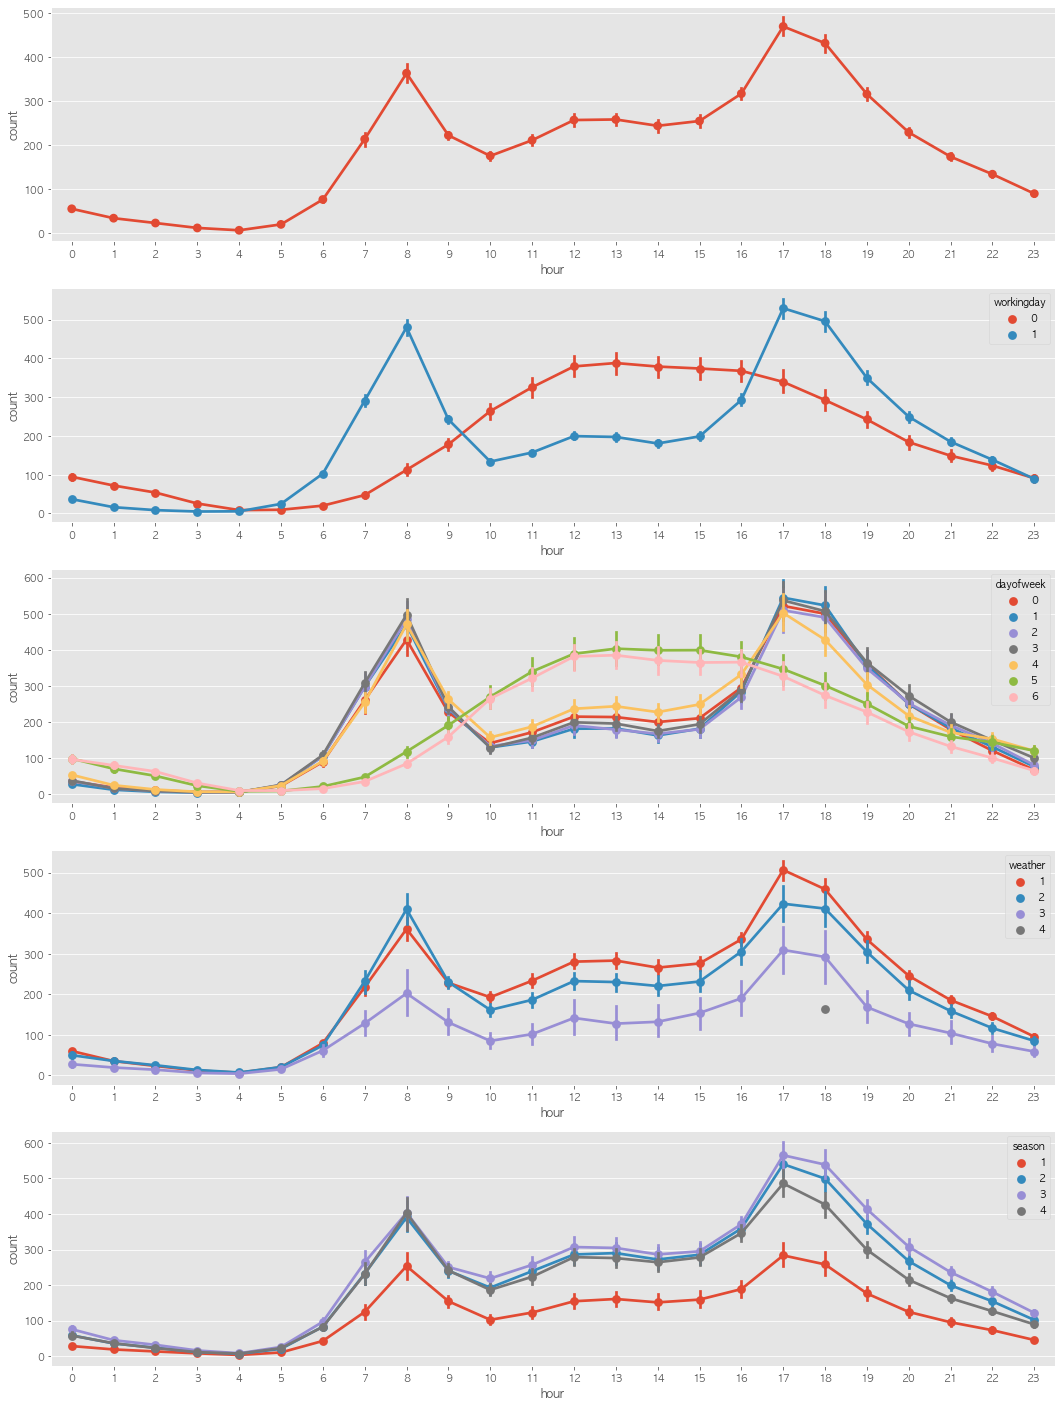

In [31]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data = train, x = 'hour', y = 'count', ax = ax1)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday', ax = ax2)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek', ax = ax3)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather', ax = ax4)
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season', ax = ax5)


In [33]:
# relation 확인 
corrMatt = train[['temp','atemp','casual','registered','humidity','windspeed','count']]
corrMatt = corrMatt.corr()

print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  registered  humidity  windspeed  \
temp        1.000000  0.984948  0.467097    0.318571 -0.064949  -0.017852   
atemp       0.984948  1.000000  0.462067    0.314635 -0.043536  -0.057473   
casual      0.467097  0.462067  1.000000    0.497250 -0.348187   0.092276   
registered  0.318571  0.314635  0.497250    1.000000 -0.265458   0.091052   
humidity   -0.064949 -0.043536 -0.348187   -0.265458  1.000000  -0.318607   
windspeed  -0.017852 -0.057473  0.092276    0.091052 -0.318607   1.000000   
count       0.394454  0.389784  0.690414    0.970948 -0.317371   0.101369   

               count  
temp        0.394454  
atemp       0.389784  
casual      0.690414  
registered  0.970948  
humidity   -0.317371  
windspeed   0.101369  
count       1.000000  


<AxesSubplot:>

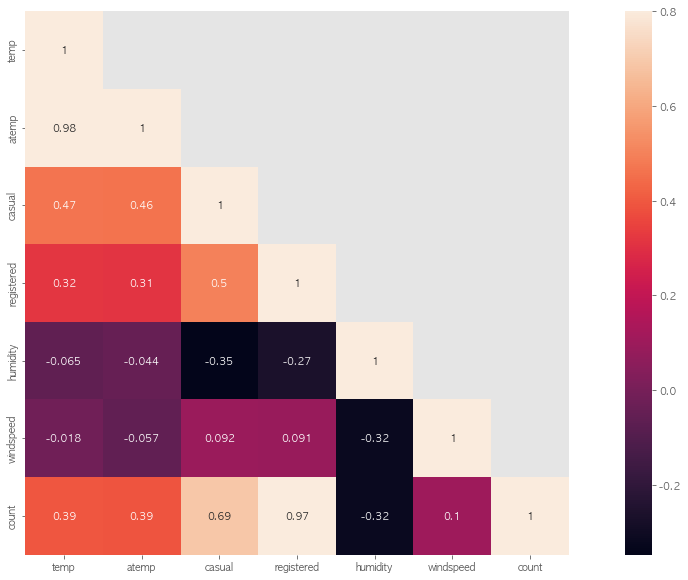

In [36]:
# heatmap 

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True)

## 해석
- 온도, 습도 ,풍속은 거의 연관관계 없음
- 대여량과 가장 연관이 높은건 registered로, 등록된 대여자가 많지만 test에 이 값이 없어서 사용 불가
- atemp, temp는 0.98로 상관은 높으나, 피처로 사용하기에 적합하지 않을 수 있다.

<AxesSubplot:xlabel='humidity', ylabel='count'>

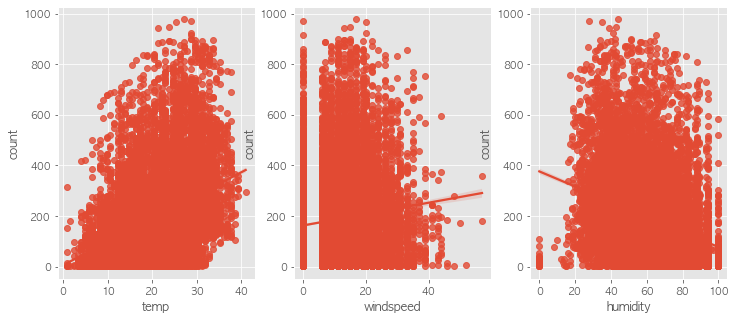

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3)
fig.set_size_inches(12, 5)

sns.regplot(x = 'temp', y = 'count', data = train, ax = ax1)
sns.regplot(x = 'windspeed', y = 'count', data = train, ax = ax2)
sns.regplot(x = 'humidity', y = 'count', data = train, ax = ax3)


- 풍속의 경우 0에 몰려이?ㅆ고, 관측되지 않은 수치가 0으로 몰린 듯

In [38]:
## 연/월 합 쳐서 해보자

def concatenate_year_month(datetime):
    return "{0} - {1}".format(datetime.year, datetime.month)

train['year_month'] = train['datetime'].apply(concatenate_year_month)

print(train.shape)
train[['datetime', 'year_month']].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011 - 1
1,2011-01-01 01:00:00,2011 - 1
2,2011-01-01 02:00:00,2011 - 1
3,2011-01-01 03:00:00,2011 - 1
4,2011-01-01 04:00:00,2011 - 1


<AxesSubplot:xlabel='year_month', ylabel='count'>

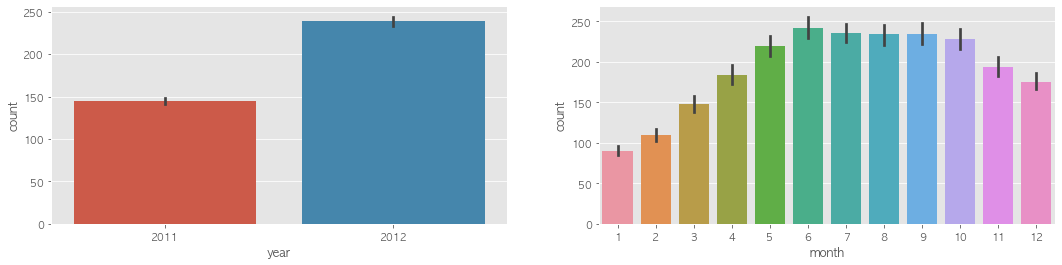

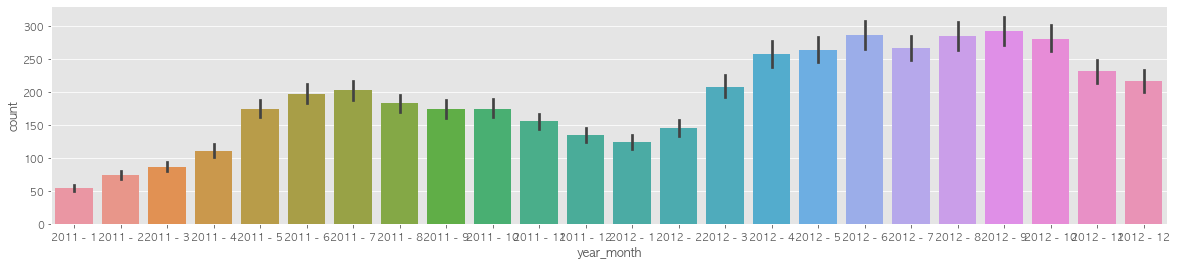

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = 'year', y = 'count' , ax = ax1)
sns.barplot(data = train, x = 'month', y = 'count' , ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(20, 4)

sns.barplot(data = train, x = 'year_month', y = 'count', ax = ax3)

- 2011년보다 2012년이 더 많다
- 겨울보다는 여름 대여량이 많다.
- 2011과 2012월별 데이터를 보면, 증가하는 추세이다

In [41]:
## train without outlier 

trainWithoutOutliers = train[np.abs(train['count'] - train['count'].mean()) <= (3*train['count'])]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(8001, 20)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.75512118, -3.52683847, -3.40136165, ...,  3.40136165,
          3.52683847,  3.75512118]),
  array([3.8918203 , 3.8918203 , 3.8918203 , ..., 6.87626461, 6.87832647,
         6.88550967])),
 (0.6811413933668111, 5.319241302387579, 0.9926479860119485))

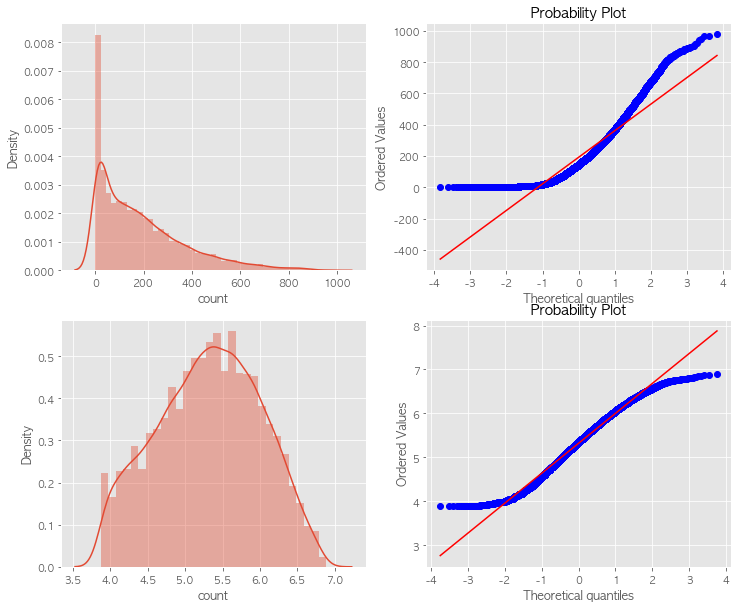

In [48]:
figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train['count'], ax = axes[0][0])
stats.probplot(train['count'], dist = 'norm', fit = True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers['count']), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers['count']), dist = 'norm', fit = True, plot = axes[1][1])
